#### Question 1: Find the factors which are responsible for Price of the car ,                                                                   Question 2: Write the equation to find price of a car	,							                                                                Question 3: How the factors are affecting the price		,						                                                                      Question 4: What is the R^2 and adj. R^2 ? What is the values of both for these module		,						Question 4: What is RMSE. How to reduce it ?								










In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor,LinearRegression,GammaRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r'C:\Users\91708\Downloads\Regression-20210605T094615Z-001\Regression\Case1.xlsx')

In [3]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  Price              11914 non-null  int64  
dtypes: float64(3), int64(5

### MISSING VALUES

In [5]:
missing=data.isnull().sum()

#### The list of variables having missing values greater than zero

In [6]:
missing[missing>0]

Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

In [7]:
cat_var=data.select_dtypes(include=object).columns.to_list()#categorical variable
num_var=data.select_dtypes(include=np.number).columns.to_list()#numeric variable
print(data[cat_var].isnull().sum())
print(data[num_var].isnull().sum())

Make                    0
Model                   0
Engine Fuel Type        3
Transmission Type       0
Driven_Wheels           0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
dtype: int64
Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
Price                0
dtype: int64


In [8]:
data['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [9]:
data['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Performance,Hybrid                                    1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: Market Category, Length: 71, dtype: int64

In [10]:
data['Engine Fuel Type']=data['Engine Fuel Type'].fillna('regular unleaded')
data['Market Category']=data['Market Category'].fillna('Crossover')

In [11]:
data[cat_var].isnull().sum()

Make                 0
Model                0
Engine Fuel Type     0
Transmission Type    0
Driven_Wheels        0
Market Category      0
Vehicle Size         0
Vehicle Style        0
dtype: int64

In [12]:
def missing_treat(x):
    x=x.fillna(x.median())
    return x

In [13]:
data[num_var]=data[num_var].apply(lambda x: missing_treat(x))

In [14]:
data[num_var].isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
Price               0
dtype: int64

### UNIVARIATE ANALYSIS

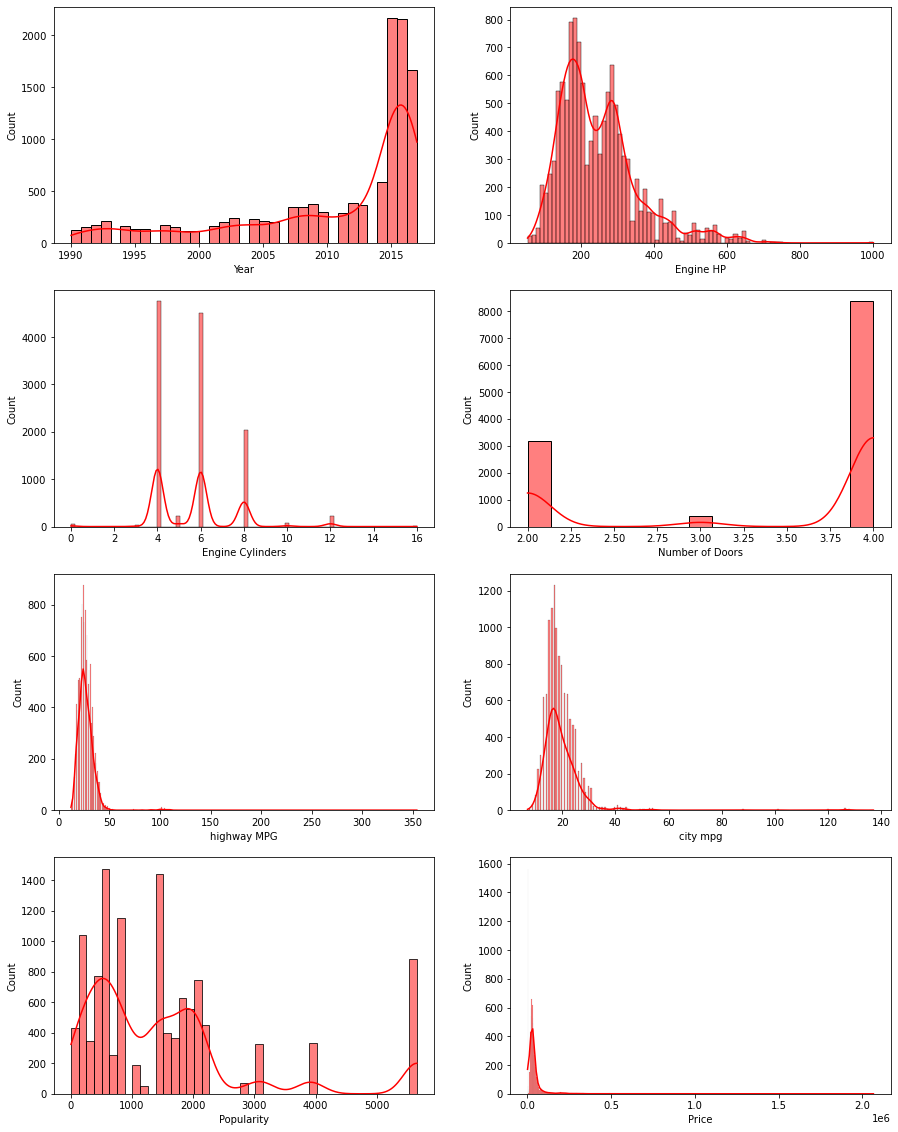

In [15]:
i=1
plt.figure(figsize=(15,20))
for j in num_var:
    plt.subplot(4,2,i)
    sns.histplot(data=data,x=data[j],kde=True,color='red')
    i+=1

#### none of the graph is not exactly normaly distributed ,so we impute missing values by its median

### OUTLIERS

In [16]:
num_var1=[
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity']

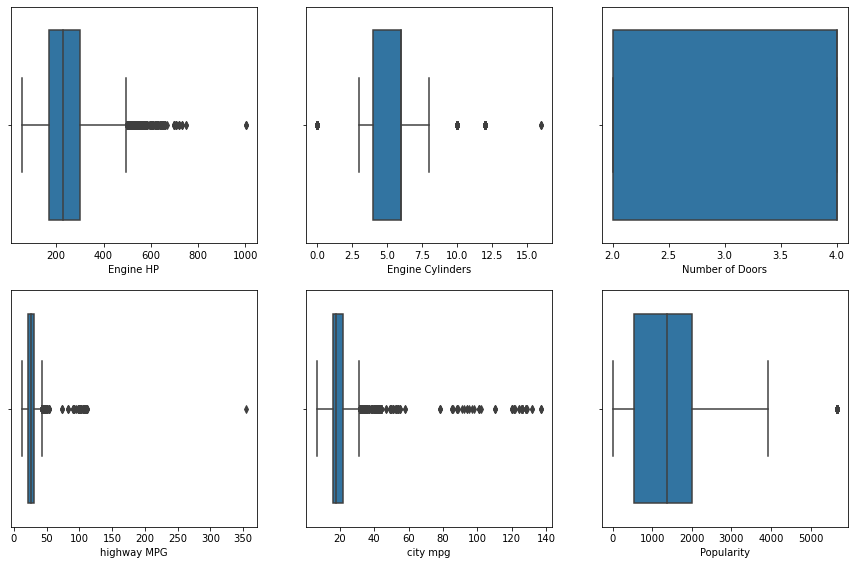

In [17]:
i=1
plt.figure(figsize=(15,20))
for j in num_var1:
    plt.subplot(4,3,i)
    sns.boxplot(data=data,x=data[j])
    i+=1

#### as we can see above the variables is containing outlier

In [18]:
def outlier_treat(x):
    upper=x.quantile(.95)
    lower=x.quantile(.05)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [19]:
data[num_var1]=data[num_var1].apply(lambda x: outlier_treat(x))

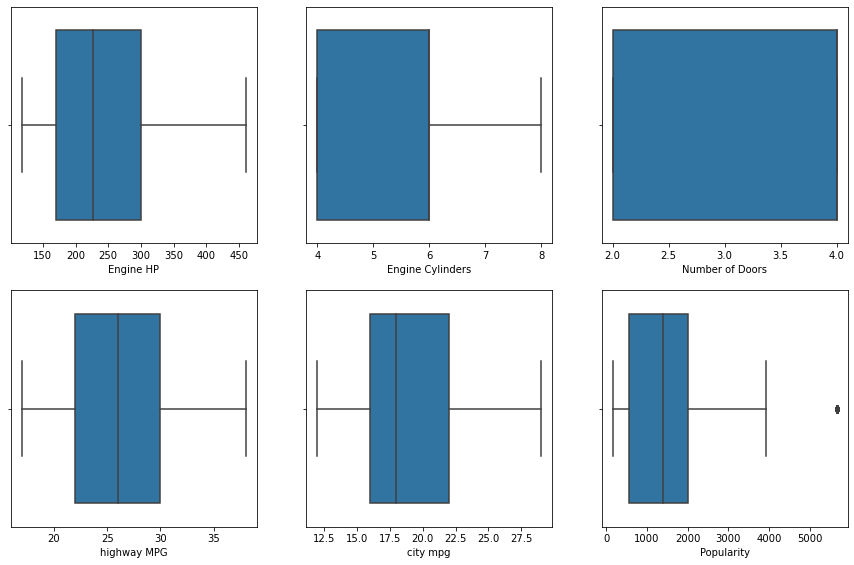

In [20]:
i=1
plt.figure(figsize=(15,20))
for j in num_var1:
    plt.subplot(4,3,i)
    sns.boxplot(data=data,x=data[j])
    i+=1

#### oulier are removed

### BIVARIATE ANALYSIS

In [21]:
print(cat_var)
print(num_var)

['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'Price']


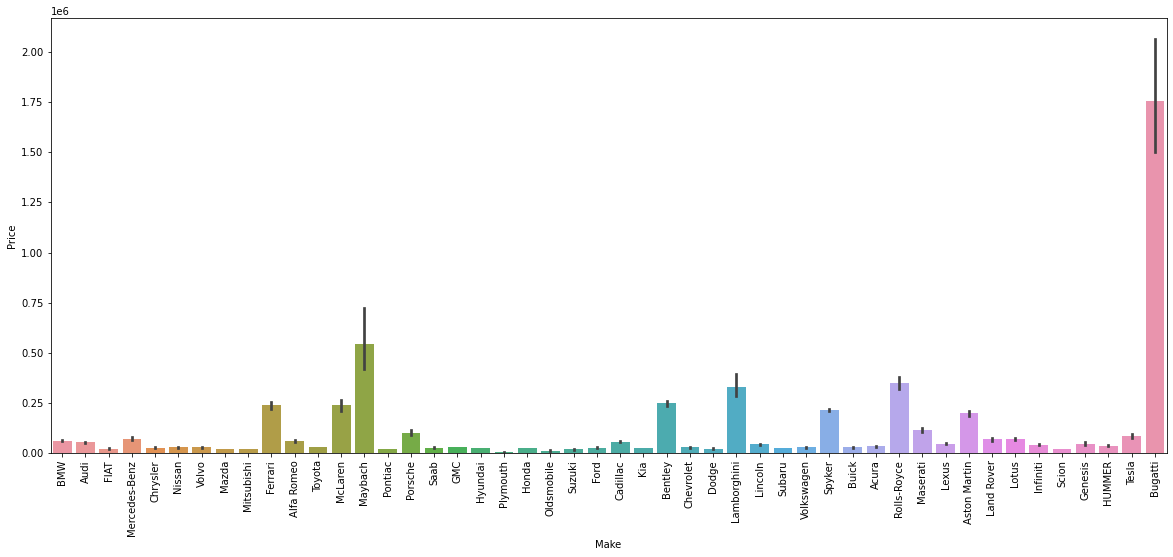

In [22]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=data,x='Make',y='Price',ax=ax)
plt.xticks(rotation=90)
plt.show()

#### we can see that the buggati has the highest mean price

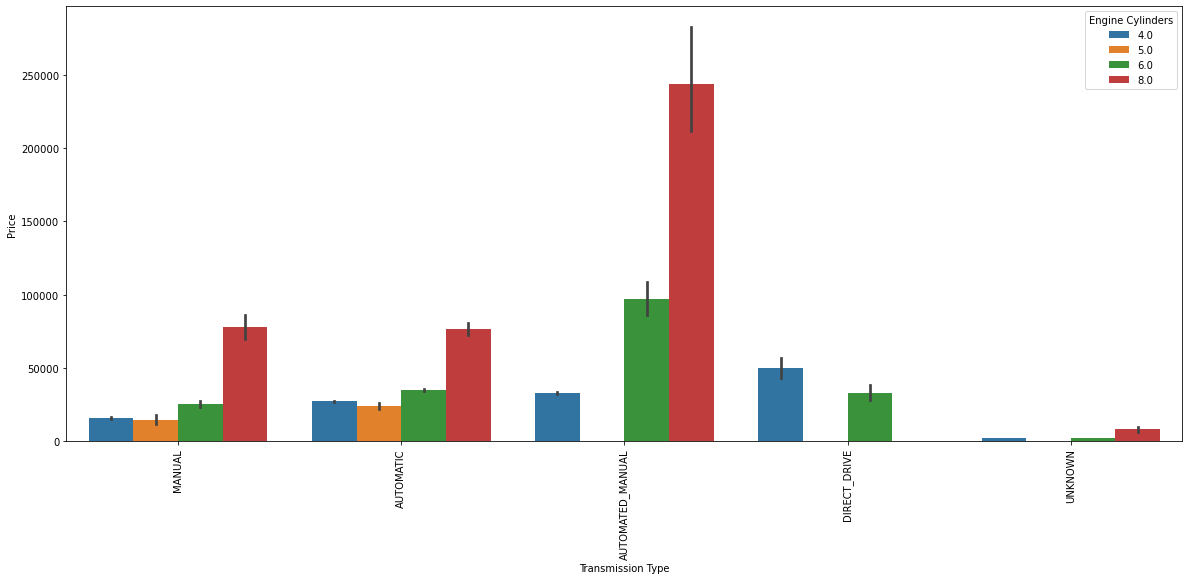

In [23]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=data,x='Transmission Type',y='Price',ax=ax,hue='Engine Cylinders')
plt.xticks(rotation=90)
plt.show()

#### we can see that automated_manual transmission type with 8 cylinder has the highest price

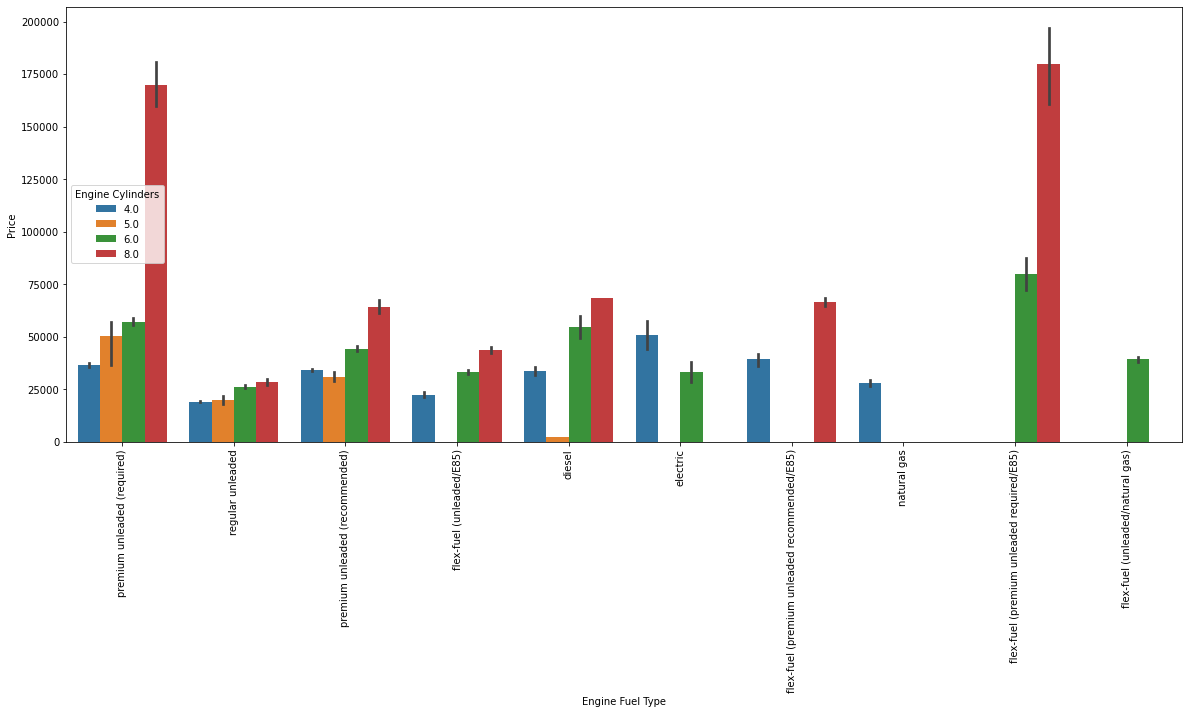

In [24]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=data,x='Engine Fuel Type',y='Price',ax=ax,hue='Engine Cylinders')
plt.xticks(rotation=90)
plt.show()

#### we can see that flex-fuel (premium unleaded required/E85) engine feul type with 8 cylinder has the highest price.

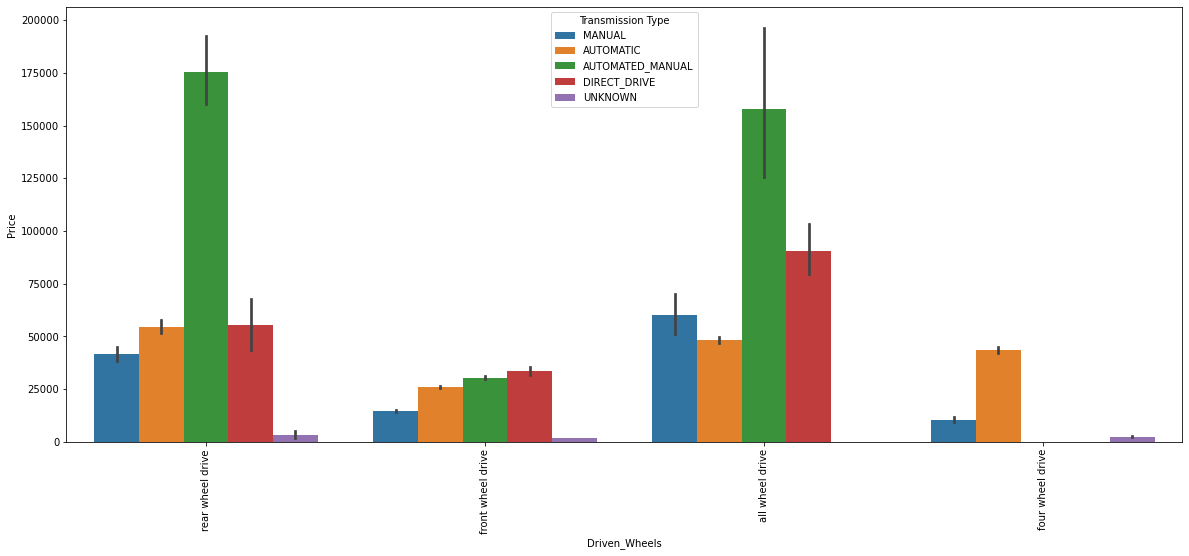

In [25]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=data,x='Driven_Wheels',y='Price',ax=ax,hue='Transmission Type')
plt.xticks(rotation=90)
plt.show()

####  all wheel drive with automated_manual has the highest price

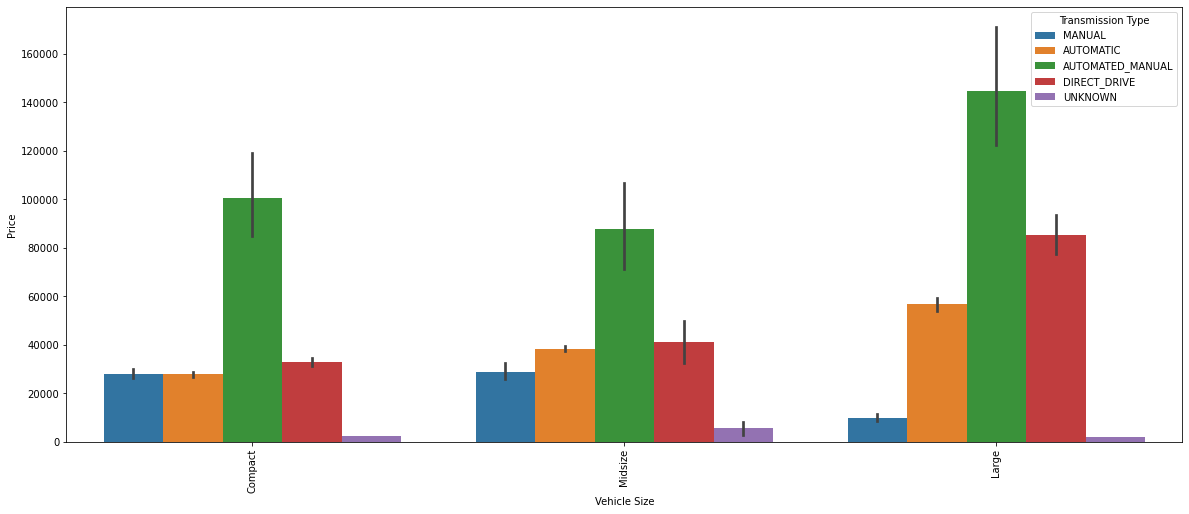

In [26]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot(data=data,x='Vehicle Size',y='Price',ax=ax,hue='Transmission Type')
plt.xticks(rotation=90)
plt.show()

#### we can see that large vehicle size with automated_manual drive has the highest price

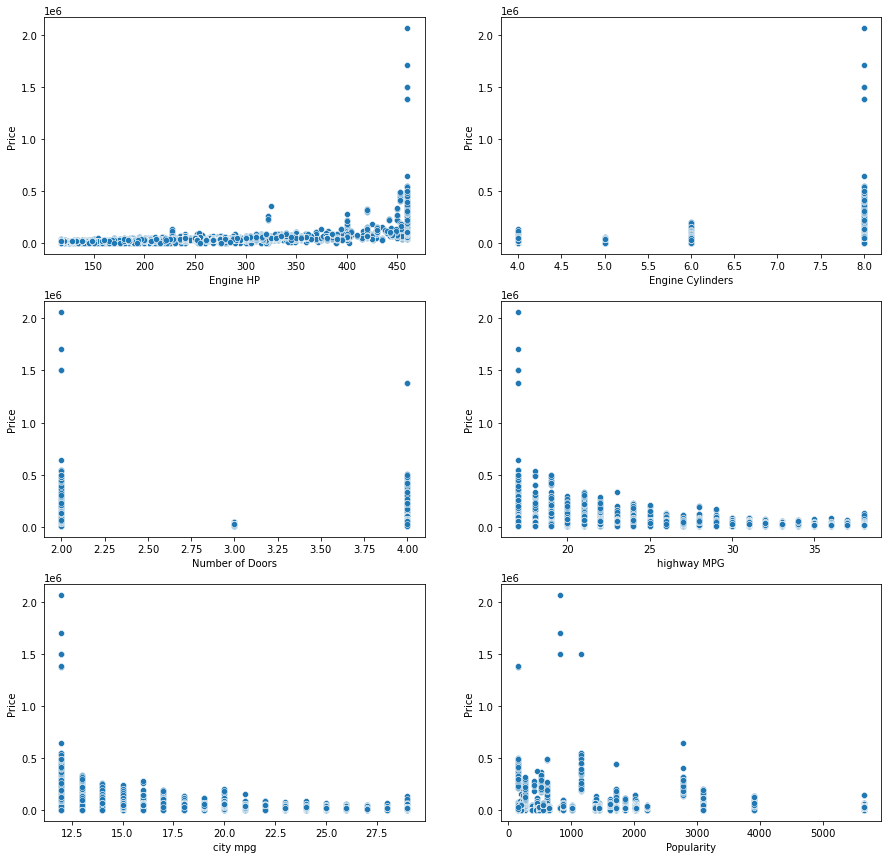

In [27]:
i=1
plt.figure(figsize=(15,20))
for j in num_var1:
    plt.subplot(4,2,i)
    sns.scatterplot(y=data['Price'],x=data[j])
    i+=1

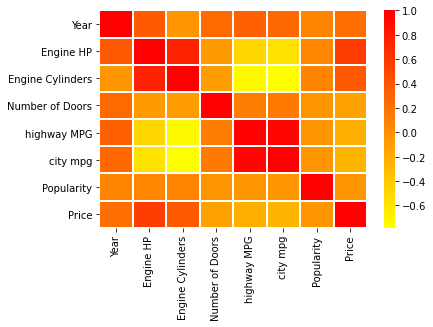

In [28]:
sns.heatmap(data.corr(),linewidths=1,cmap='autumn_r')
plt.show()

#### we can see that as Engine HP increases Price is increase                                                                                                                                                                                                                                                                            -as MPG increase price decreases

### FEATURE ENGINEERING

In [29]:
lb=LabelEncoder()
cat_var

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Market Category',
 'Vehicle Size',
 'Vehicle Style']

In [30]:
data1=data.copy()

In [31]:
data1['Model']=data1['Model'].apply(lambda x: str(x))#convert model's unique value to str

In [32]:
for i in cat_var:
    data1[i]=lb.fit_transform(data1[i])

In [33]:
data1

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Price
0,4,1,2011,8,335.0,6.0,3,3,2.0,38,0,8,26.0,19.0,3916.0,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,67,0,6,28.0,19.0,3916.0,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,64,0,8,28.0,20.0,3916.0,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,67,0,8,28.0,18.0,3916.0,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,63,0,6,28.0,18.0,3916.0,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23.0,16.0,204.0,46120
11910,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23.0,16.0,204.0,56670
11911,0,901,2012,8,300.0,6.0,1,0,4.0,13,2,2,23.0,16.0,204.0,50620
11912,0,901,2013,7,300.0,6.0,1,0,4.0,13,2,2,23.0,16.0,204.0,50920


In [34]:
sc=StandardScaler()

In [35]:
scaled=sc.fit_transform(data1.drop(columns='Price'))
scaled=pd.DataFrame(scaled,columns=data1.drop(columns='Price').columns)

In [36]:
scaled

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,-1.321914,-1.704637,0.081228,0.004014,0.958566,0.294163,1.675670,1.152896,-1.630122,0.342328,-1.105198,-0.072270,-0.032128,-0.008390,1.639238
1,-1.321914,-1.708349,0.081228,0.004014,0.584637,0.294163,1.675670,1.152896,-1.630122,1.399283,-1.105198,-0.479182,0.307361,-0.008390,1.639238
2,-1.321914,-1.708349,0.081228,0.004014,0.584637,0.294163,1.675670,1.152896,-1.630122,1.289943,-1.105198,-0.072270,0.307361,0.207513,1.639238
3,-1.321914,-1.708349,0.081228,0.004014,-0.163221,0.294163,1.675670,1.152896,-1.630122,1.399283,-1.105198,-0.072270,0.307361,-0.224294,1.639238
4,-1.321914,-1.708349,0.081228,0.004014,-0.163221,0.294163,1.675670,1.152896,-1.630122,1.253496,-1.105198,-0.479182,0.307361,-0.224294,1.639238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11910,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11911,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11912,-1.596919,1.635982,0.345101,-0.552132,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828


<AxesSubplot:>

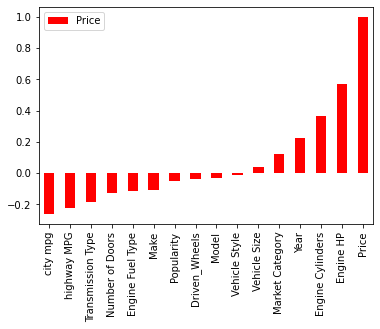

In [37]:
data1.corr()[['Price']].sort_values(by='Price').plot(kind='bar',color='red')

#### We can see the importance of feature importance of each feature in determinig of price of car

## Model Selection 

In [38]:
X=scaled
Y=data[['Price']]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [40]:

sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
bagging=BaggingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()
etr=ExtraTreesRegressor()
gamma=GammaRegressor()

In [41]:
algo=[sgd,lasso,ridge,rf,dt,gboost,bagging,adboost,knn,etr]

In [42]:
model=[]
accuracy=[]
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    accuracy.append(algo[i].score(x_test,y_test))
    model.append(algo[i])
    print(model[i],accuracy[i])

SGDRegressor() 0.48940821785875277
Lasso() 0.5043529774329394
Ridge() 0.5043671489538879
RandomForestRegressor() 0.9360998217433596
DecisionTreeRegressor() 0.9258441295591222
GradientBoostingRegressor() 0.8703546936449629
BaggingRegressor() 0.9332809711997815
AdaBoostRegressor() 0.17262292980354144
KNeighborsRegressor() 0.8673672573392714
ExtraTreesRegressor() 0.9475873463127207


In [43]:
etr1=ExtraTreesRegressor()

In [44]:
etr1.fit(x_train,y_train)

ExtraTreesRegressor()

In [45]:
etr1.score(x_test,y_test)

0.9460166048923397

In [46]:
cv_score=cross_val_score(etr1,x_train,y_train,cv=10)
print(cv_score.mean())# mean cross-validation score is .9467

0.9425308892672402


In [47]:
y_pred=etr1.predict(x_test)

<BarContainer object of 15 artists>

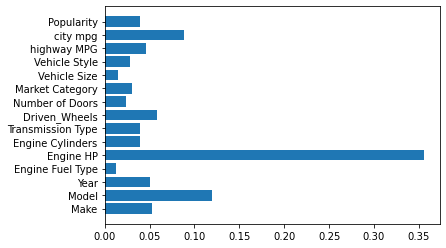

In [78]:
plt.barh(X.columns,etr1.feature_importances_)

#### Here we cann see the feature importance in determining the price of car

### R-Square

In [48]:
r2_score(y_test,y_pred)

0.9460166048923397

### Adjusted R-Square Score=1-(1-R^2)* (n-1)/(n-k-1)

In [49]:
print(1-(1-r2_score(y_test,y_pred))* (len(Y)-1)/(len(Y)-X.shape[1]-1))# so we have got adjusted r2 
                                                                      #as .9467

0.9459485471577108


### MSE,RMSE

In [50]:
print('mean square error is:',mean_squared_error(y_pred,y_test))
print('root mean square error is :',np.sqrt(mean_squared_error(y_pred,y_test)))

mean square error is: 118605180.27262978
root mean square error is : 10890.600546922551


In [51]:
x_value=range(len(y_test))

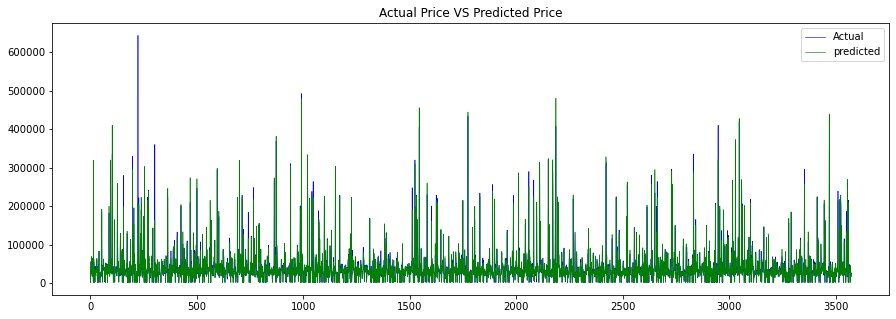

In [52]:
plt.figure(figsize=(15,5))
plt.plot(x_value,y_test,color='blue',label='Actual',lw=.6)
plt.plot(x_value,y_pred,color='green',label='predicted',lw=.6)
plt.legend()
plt.title('Actual Price VS Predicted Price')
plt.show()

In [53]:
y_test1=y_test.copy()

In [54]:
y_test1['predicted_price']=y_pred

In [55]:
y_test1.corr()# accuracy is 97.30%

,Price,predicted_price
Price,1.000000,0.972671
predicted_price,0.972671,1.000000


### Linear Model

In [56]:
X.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [57]:
lr=LinearRegression()

In [61]:
X1=scaled
X1

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,-1.321914,-1.704637,0.081228,0.004014,0.958566,0.294163,1.675670,1.152896,-1.630122,0.342328,-1.105198,-0.072270,-0.032128,-0.008390,1.639238
1,-1.321914,-1.708349,0.081228,0.004014,0.584637,0.294163,1.675670,1.152896,-1.630122,1.399283,-1.105198,-0.479182,0.307361,-0.008390,1.639238
2,-1.321914,-1.708349,0.081228,0.004014,0.584637,0.294163,1.675670,1.152896,-1.630122,1.289943,-1.105198,-0.072270,0.307361,0.207513,1.639238
3,-1.321914,-1.708349,0.081228,0.004014,-0.163221,0.294163,1.675670,1.152896,-1.630122,1.399283,-1.105198,-0.072270,0.307361,-0.224294,1.639238
4,-1.321914,-1.708349,0.081228,0.004014,-0.163221,0.294163,1.675670,1.152896,-1.630122,1.253496,-1.105198,-0.479182,0.307361,-0.224294,1.639238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11910,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11911,-1.596919,1.635982,0.213164,0.004014,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828
11912,-1.596919,1.635982,0.345101,-0.552132,0.584637,0.294163,-0.487387,-1.659471,0.639646,-0.568840,1.180202,-1.293007,-0.541361,-0.656100,-0.941828


In [62]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,test_size=0.3,random_state=0)

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [64]:
lr.score(x_test,y_test)

0.5043385622743443

In [67]:
lr.intercept_

array([41070.34762389])

In [68]:
lr.coef_

array([[-1243.82397428, -1279.09589864, -4343.23124084,  -436.3443902 ,
        47729.96302409, -8812.33160988, -6658.32240352, -2057.56990865,
        -8219.32879139, -6442.30712287, -5453.30784833,  1774.3747378 ,
        -3947.73457576,  9746.33305225, -5535.06620537]])

In [69]:
X1.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

#### equation

In [76]:
# Price=41070.34 -5535.06*'Popularity' +9746.33*'city mpg'-3947.73*'highway MPG'+1774.37*'Vehicle Style'
# -5453.30*'Vehicle Size'-6442.30*'Market Category-8219.3*Number of Doors-2057.56*'Driven_Wheels
#-6658.32*'Transmission Type-8812.33*'Engine Cylinders+47729.9*'Engine HP'-436.3*'Engine Fuel Type
#-4343.23*'Year'